## **IMPORTING LIBRARIES**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
pd.set_option('display.max_columns',None)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVR
# from sklearn.linear_model import Lasso, Ridge
import xgboost as xgb

import warnings 
warnings.filterwarnings('ignore',category=DeprecationWarning)

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## **DATA COLLECTION AND ANALYSIS**

In [127]:
train=pd.read_csv('D:\Google Drive\imarticus python\Eneeyan\WineQT_prediction.csv')

In [128]:
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [129]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [130]:
train.shape

(1143, 13)

In [131]:
train.duplicated().sum()

0

In [132]:
def summary(train):
    sum = pd.DataFrame(train.dtypes, columns=['dtypes'])
    sum['missing#'] = train.isna().sum()
    sum['missing%'] = (train.isna().sum().values*100)/len(train)
    sum['uniques'] = train.nunique().values
    sum['count'] = train.count().values
    # sum['value_counts']=train.value_counts()
    # sum['skew'] = train.skew().values
    desc = pd.DataFrame(train.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(train).style.background_gradient(cmap='GnBu')

,dtypes,missing#,missing%,uniques,count,min,max,mean
fixed acidity,float64,0,0.000000,91,1143,4.600000,15.900000,8.311111
volatile acidity,float64,0,0.000000,135,1143,0.120000,1.580000,0.531339
citric acid,float64,0,0.000000,77,1143,0.000000,1.000000,0.268364
residual sugar,float64,0,0.000000,80,1143,0.900000,15.500000,2.532152
chlorides,float64,0,0.000000,131,1143,0.012000,0.611000,0.086933
free sulfur dioxide,float64,0,0.000000,53,1143,1.000000,68.000000,15.615486
total sulfur dioxide,float64,0,0.000000,138,1143,6.000000,289.000000,45.914698
density,float64,0,0.000000,388,1143,0.990070,1.003690,0.996730
pH,float64,0,0.000000,87,1143,2.740000,4.010000,3.311015
sulphates,float64,0,0.000000,89,1143,0.330000,2.000000,0.657708


## **DATA VISUALIZATION**

<AxesSubplot:>

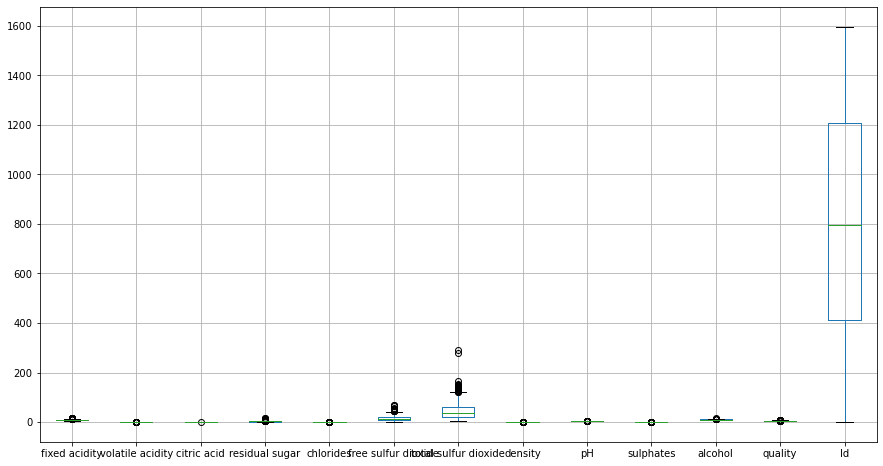

In [133]:
plt.figure(figsize=(15,8))
train.boxplot()

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'Id'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

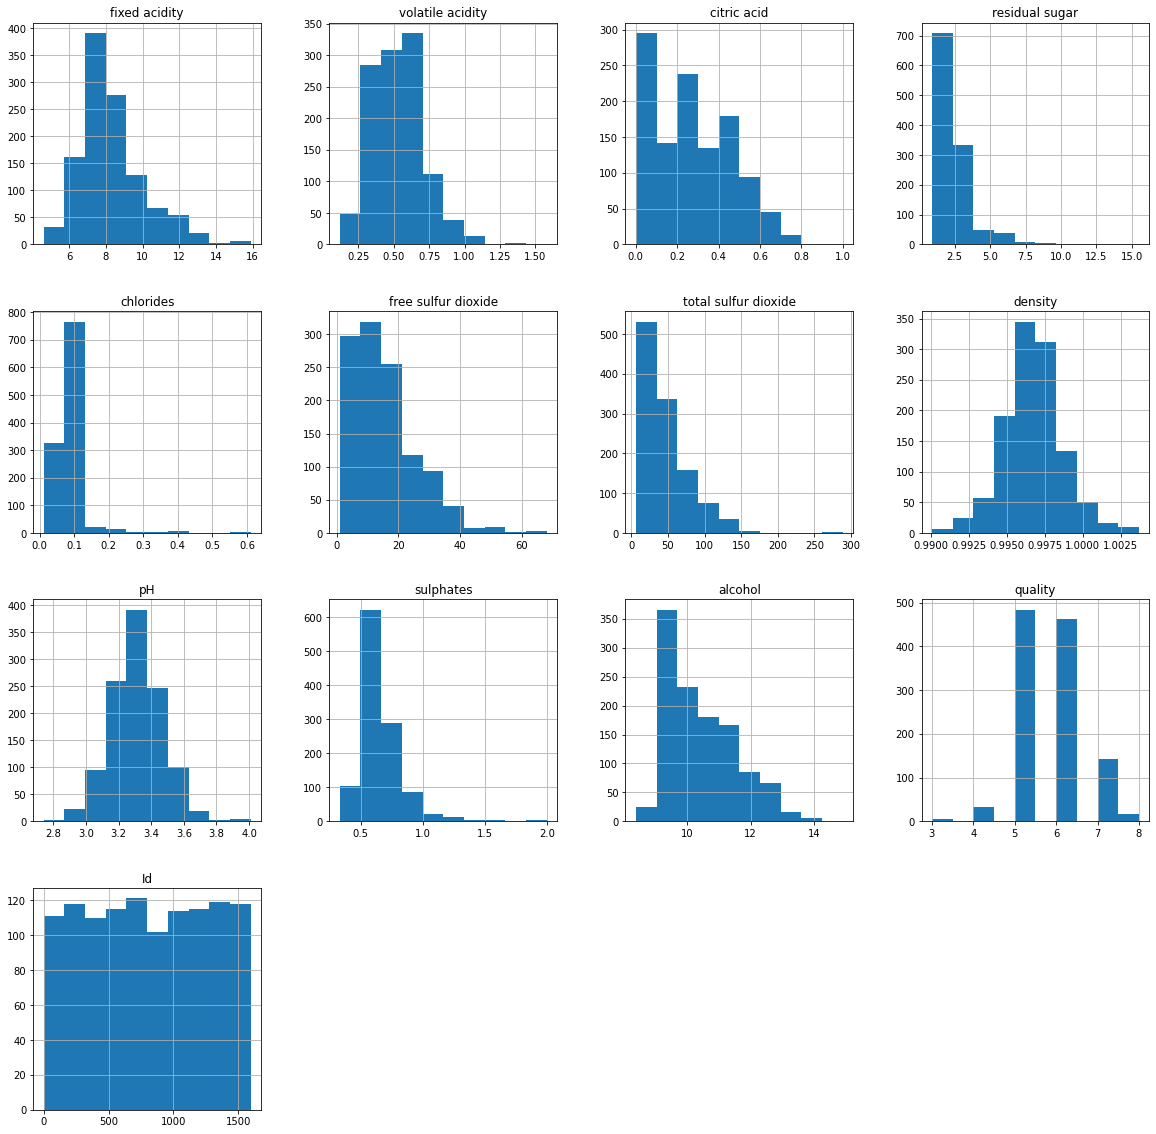

In [134]:
train.hist(figsize=(20,20))


<AxesSubplot:xlabel='quality', ylabel='count'>

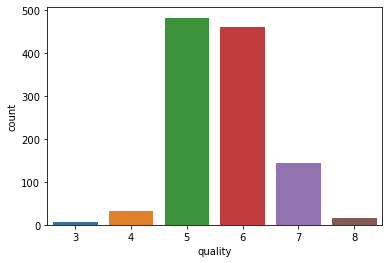

In [135]:
sns.countplot(data=train,x='quality')

<AxesSubplot:>

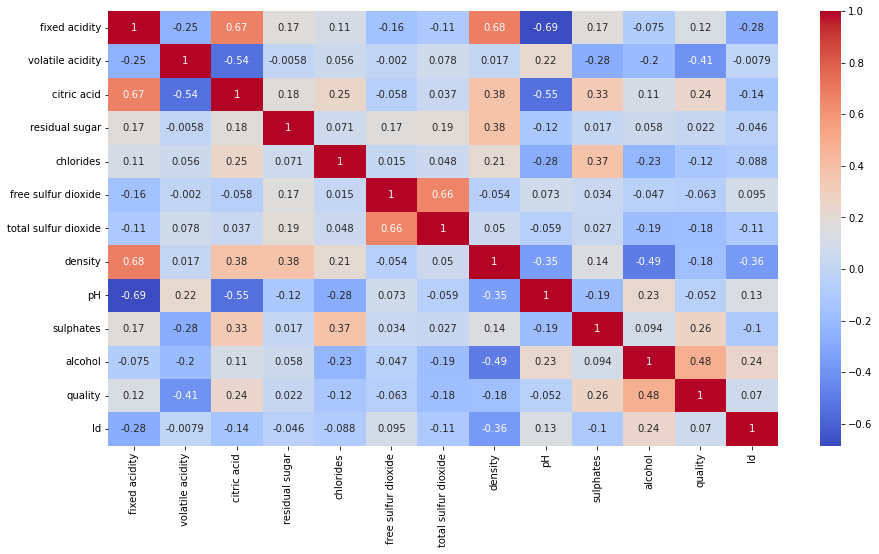

In [136]:
plt.figure(figsize=(15,8))
sns.heatmap(train.corr(),annot=True,cmap='coolwarm')

## **SPLITTING**

In [137]:
x = train.drop('quality', axis=1)
y = train['quality']

## **SMOTING**

In [138]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_sm,y_sm=sm.fit_resample(x,y)

In [139]:
print(x_sm.shape)
print(y_sm.shape)

(2898, 12)
(2898,)


## **SCALING**

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
sc=StandardScaler()
x_sc=sc.fit_transform(x_sm)

In [142]:
xtrain,xtest,ytrain,ytest=train_test_split(x_sc,y_sm,test_size=0.2,random_state=142)

In [143]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(2318, 12)
(580, 12)
(2318,)
(580,)


In [144]:
def acc_report(actual,predicted):
    acc_score=accuracy_score(actual,predicted)
    cm_matrix=confusion_matrix(actual,predicted)
    class_rep=classification_report(actual,predicted)
    print('the accuracy of tha model is ',acc_score)
    print(cm_matrix)
    print(class_rep)

## **LogisticRegression**

In [145]:
lgr=LogisticRegression()
lgr.fit(xtrain,ytrain)
pred_lgr_train=lgr.predict(xtrain)
pred_lgr_test=lgr.predict(xtest)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [146]:
acc_report(ytrain,pred_lgr_train)

the accuracy of tha model is  0.6531492666091459
[[387   0   0   0   0   0]
 [ 18 240  68  45  10   0]
 [ 16  75 221  59  13  10]
 [  5  48  79 140  75  32]
 [  0  17  15  64 204  89]
 [  0   0   0   0  66 322]]
              precision    recall  f1-score   support

           3       0.91      1.00      0.95       387
           4       0.63      0.63      0.63       381
           5       0.58      0.56      0.57       394
           6       0.45      0.37      0.41       379
           7       0.55      0.52      0.54       389
           8       0.71      0.83      0.77       388

    accuracy                           0.65      2318
   macro avg       0.64      0.65      0.64      2318
weighted avg       0.64      0.65      0.64      2318



In [147]:
acc_report(ytest,pred_lgr_test)

the accuracy of tha model is  0.6448275862068965
[[96  0  0  0  0  0]
 [ 7 66 12 10  7  0]
 [ 1 18 47 14  7  2]
 [ 2 16 25 31 22  8]
 [ 0  3  3 16 57 15]
 [ 0  0  0  0 18 77]]
              precision    recall  f1-score   support

           3       0.91      1.00      0.95        96
           4       0.64      0.65      0.64       102
           5       0.54      0.53      0.53        89
           6       0.44      0.30      0.35       104
           7       0.51      0.61      0.56        94
           8       0.75      0.81      0.78        95

    accuracy                           0.64       580
   macro avg       0.63      0.65      0.64       580
weighted avg       0.63      0.64      0.63       580



## **RandomForestClassifier**

In [204]:
rf=RandomForestClassifier(n_estimators=400,max_depth=100,min_samples_split=18,min_samples_leaf=3)
rf.fit(xtrain,ytrain)
pred_rf_train=rf.predict(xtrain)
pred_rf_test=rf.predict(xtest)

In [205]:
acc_report(ytrain,pred_rf_train)

the accuracy of tha model is  0.9396031061259706
[[387   0   0   0   0   0]
 [  0 380   1   0   0   0]
 [  2   5 357  20  10   0]
 [  1   6  42 292  33   5]
 [  0   2   2   5 374   6]
 [  0   0   0   0   0 388]]
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       387
           4       0.97      1.00      0.98       381
           5       0.89      0.91      0.90       394
           6       0.92      0.77      0.84       379
           7       0.90      0.96      0.93       389
           8       0.97      1.00      0.99       388

    accuracy                           0.94      2318
   macro avg       0.94      0.94      0.94      2318
weighted avg       0.94      0.94      0.94      2318



In [206]:
acc_report(ytest,pred_rf_test)

the accuracy of tha model is  0.8068965517241379
[[ 96   0   0   0   0   0]
 [  0 100   2   0   0   0]
 [  1   8  57  13  10   0]
 [  0   5  34  35  30   0]
 [  0   1   1   3  85   4]
 [  0   0   0   0   0  95]]
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        96
           4       0.88      0.98      0.93       102
           5       0.61      0.64      0.62        89
           6       0.69      0.34      0.45       104
           7       0.68      0.90      0.78        94
           8       0.96      1.00      0.98        95

    accuracy                           0.81       580
   macro avg       0.80      0.81      0.79       580
weighted avg       0.80      0.81      0.79       580



## **DecisionTreeClassifier with RandomizedSearchCV**

In [207]:
dt=DecisionTreeClassifier()

In [155]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
random = {
    'max_depth': [i for i in range(5, 70, 2)],
    'min_samples_leaf': [x for x in range(2, 30, 2)],
    'min_samples_split': [x for x in range(8, 50, 2)],
    'criterion': ['gini', 'entropy']
}

In [156]:
clf=RandomizedSearchCV(dt,random,scoring='accuracy',verbose=2)
search=clf.fit(xtrain,ytrain)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END criterion=entropy, max_depth=49, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END criterion=entropy, max_depth=49, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END criterion=entropy, max_depth=49, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END criterion=entropy, max_depth=49, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END criterion=entropy, max_depth=49, min_samples_leaf=8, min_samples_split=30; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END criterion=entropy, max_depth=23, min_samples_leaf=14, min_samples_split=10; total time=   0.0s
[CV] END

In [158]:
search.best_score_

0.7049257093915245

In [159]:
search.best_params_

{'min_samples_split': 24,
 'min_samples_leaf': 2,
 'max_depth': 41,
 'criterion': 'gini'}

In [253]:
dt=DecisionTreeClassifier(min_samples_split=3,min_samples_leaf=2,max_depth=50,criterion='gini')
dt.fit(xtrain,ytrain)
pred_dt_train=dt.predict(xtrain)
pred_dt_test=dt.predict(xtest)

In [254]:
acc_report(ytrain,pred_dt_train)

the accuracy of tha model is  0.956427955133736
[[387   0   0   0   0   0]
 [  0 381   0   0   0   0]
 [  0   9 379   6   0   0]
 [  2   7  27 339   2   2]
 [  1   4  11  23 350   0]
 [  0   0   0   6   1 381]]
              precision    recall  f1-score   support

           3       0.99      1.00      1.00       387
           4       0.95      1.00      0.97       381
           5       0.91      0.96      0.93       394
           6       0.91      0.89      0.90       379
           7       0.99      0.90      0.94       389
           8       0.99      0.98      0.99       388

    accuracy                           0.96      2318
   macro avg       0.96      0.96      0.96      2318
weighted avg       0.96      0.96      0.96      2318



In [255]:
acc_report(ytest,pred_dt_test)

the accuracy of tha model is  0.7706896551724138
[[95  1  0  0  0  0]
 [ 0 92  7  1  2  0]
 [ 4 13 50 15  7  0]
 [ 2 12 26 48 14  2]
 [ 0  3  2 11 72  6]
 [ 0  0  0  2  3 90]]
              precision    recall  f1-score   support

           3       0.94      0.99      0.96        96
           4       0.76      0.90      0.83       102
           5       0.59      0.56      0.57        89
           6       0.62      0.46      0.53       104
           7       0.73      0.77      0.75        94
           8       0.92      0.95      0.93        95

    accuracy                           0.77       580
   macro avg       0.76      0.77      0.76       580
weighted avg       0.76      0.77      0.76       580



## **AdaBoostClassifier**

In [273]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.9323)
ada.fit(xtrain,ytrain)
y_pred_train_ada=ada.predict(xtrain)
y_pred_test_ada=ada.predict(xtest)

In [274]:
acc_report(ytrain,y_pred_train_ada)

the accuracy of tha model is  0.319672131147541
[[387   0   0   0   0   0]
 [271   0   0   0 100  10]
 [283   0   4   0 105   2]
 [184   0   1   0 188   6]
 [ 63   0   0   0 322   4]
 [  0   0   1   0 359  28]]
              precision    recall  f1-score   support

           3       0.33      1.00      0.49       387
           4       0.00      0.00      0.00       381
           5       0.67      0.01      0.02       394
           6       0.00      0.00      0.00       379
           7       0.30      0.83      0.44       389
           8       0.56      0.07      0.13       388

    accuracy                           0.32      2318
   macro avg       0.31      0.32      0.18      2318
weighted avg       0.31      0.32      0.18      2318



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [275]:
acc_report(ytest,y_pred_test_ada)

the accuracy of tha model is  0.31896551724137934
[[96  0  0  0  0  0]
 [79  0  0  0 18  5]
 [61  0  0  0 26  2]
 [53  0  0  0 50  1]
 [11  0  0  0 83  0]
 [ 0  0  0  0 89  6]]
              precision    recall  f1-score   support

           3       0.32      1.00      0.48        96
           4       0.00      0.00      0.00       102
           5       0.00      0.00      0.00        89
           6       0.00      0.00      0.00       104
           7       0.31      0.88      0.46        94
           8       0.43      0.06      0.11        95

    accuracy                           0.32       580
   macro avg       0.18      0.32      0.18       580
weighted avg       0.17      0.32      0.17       580



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **GradientBoostingClassifier**

In [276]:
gb=GradientBoostingClassifier(learning_rate=0.9445)
gb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.9445)

In [263]:
y_pred_train_gb=gb.predict(xtrain)
y_pred_test_gb=gb.predict(xtest)


In [264]:
acc_report(ytrain,y_pred_train_gb)

the accuracy of tha model is  1.0
[[387   0   0   0   0   0]
 [  0 381   0   0   0   0]
 [  0   0 394   0   0   0]
 [  0   0   0 379   0   0]
 [  0   0   0   0 389   0]
 [  0   0   0   0   0 388]]
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       387
           4       1.00      1.00      1.00       381
           5       1.00      1.00      1.00       394
           6       1.00      1.00      1.00       379
           7       1.00      1.00      1.00       389
           8       1.00      1.00      1.00       388

    accuracy                           1.00      2318
   macro avg       1.00      1.00      1.00      2318
weighted avg       1.00      1.00      1.00      2318



In [265]:
acc_report(ytest,y_pred_test_gb)

the accuracy of tha model is  0.8310344827586207
[[96  0  0  0  0  0]
 [ 0 95  5  2  0  0]
 [ 1  6 53 22  7  0]
 [ 0  7 22 61 14  0]
 [ 0  1  1  9 82  1]
 [ 0  0  0  0  0 95]]
              precision    recall  f1-score   support

           3       0.99      1.00      0.99        96
           4       0.87      0.93      0.90       102
           5       0.65      0.60      0.62        89
           6       0.65      0.59      0.62       104
           7       0.80      0.87      0.83        94
           8       0.99      1.00      0.99        95

    accuracy                           0.83       580
   macro avg       0.83      0.83      0.83       580
weighted avg       0.82      0.83      0.83       580



In [277]:
np.sqrt(2000)

44.721359549995796

## **KNeighborsClassifier**

In [294]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=2)

In [295]:
y_pred_xtrain_knn=knn.predict(xtrain)
y_pred_xtest_knn=knn.predict(xtest)

In [296]:
acc_report(ytrain,y_pred_xtrain_knn)

the accuracy of tha model is  0.9327006039689387
[[387   0   0   0   0   0]
 [  0 381   0   0   0   0]
 [  3  30 361   0   0   0]
 [  4  18  81 276   0   0]
 [  0   2   3  13 371   0]
 [  0   0   0   1   1 386]]
              precision    recall  f1-score   support

           3       0.98      1.00      0.99       387
           4       0.88      1.00      0.94       381
           5       0.81      0.92      0.86       394
           6       0.95      0.73      0.83       379
           7       1.00      0.95      0.98       389
           8       1.00      0.99      1.00       388

    accuracy                           0.93      2318
   macro avg       0.94      0.93      0.93      2318
weighted avg       0.94      0.93      0.93      2318



In [297]:
acc_report(ytest,y_pred_xtest_knn)

the accuracy of tha model is  0.8137931034482758
[[ 96   0   0   0   0   0]
 [  1 100   1   0   0   0]
 [  1  17  53  12   6   0]
 [  5   7  34  47  11   0]
 [  0   2   3   8  81   0]
 [  0   0   0   0   0  95]]
              precision    recall  f1-score   support

           3       0.93      1.00      0.96        96
           4       0.79      0.98      0.88       102
           5       0.58      0.60      0.59        89
           6       0.70      0.45      0.55       104
           7       0.83      0.86      0.84        94
           8       1.00      1.00      1.00        95

    accuracy                           0.81       580
   macro avg       0.81      0.81      0.80       580
weighted avg       0.81      0.81      0.80       580



## **SVC**

In [298]:
svc=SVC()
svc.fit(xtrain,ytrain)

SVC()

In [299]:
y_pred_train_svc=svc.predict(xtrain)
y_pred_test_svc=svc.predict(xtest)


In [300]:
acc_report(ytrain,y_pred_train_svc)

the accuracy of tha model is  0.8248490077653149
[[387   0   0   0   0   0]
 [  2 348  21  10   0   0]
 [ 14  53 262  53   8   4]
 [  4  30  65 221  41  18]
 [  0  13   1  34 306  35]
 [  0   0   0   0   0 388]]
              precision    recall  f1-score   support

           3       0.95      1.00      0.97       387
           4       0.78      0.91      0.84       381
           5       0.75      0.66      0.71       394
           6       0.69      0.58      0.63       379
           7       0.86      0.79      0.82       389
           8       0.87      1.00      0.93       388

    accuracy                           0.82      2318
   macro avg       0.82      0.82      0.82      2318
weighted avg       0.82      0.82      0.82      2318



In [301]:
acc_report(ytest,y_pred_test_svc)

the accuracy of tha model is  0.7689655172413793
[[96  0  0  0  0  0]
 [ 0 95  6  1  0  0]
 [ 1 16 47 17  7  1]
 [ 2  5 30 38 27  2]
 [ 0  5  0  8 75  6]
 [ 0  0  0  0  0 95]]
              precision    recall  f1-score   support

           3       0.97      1.00      0.98        96
           4       0.79      0.93      0.85       102
           5       0.57      0.53      0.55        89
           6       0.59      0.37      0.45       104
           7       0.69      0.80      0.74        94
           8       0.91      1.00      0.95        95

    accuracy                           0.77       580
   macro avg       0.75      0.77      0.75       580
weighted avg       0.75      0.77      0.75       580



## **GaussianNB**

In [302]:
from sklearn.naive_bayes import GaussianNB

In [303]:
gnb=GaussianNB()
gnb.fit(xtrain,ytrain)

GaussianNB()

In [304]:
y_pred_train_gnb=gnb.predict(xtrain)
y_pred_test_gnb=gnb.predict(xtest)

In [305]:
acc_report(ytrain,y_pred_train_gnb)

the accuracy of tha model is  0.5522001725625539
[[381   6   0   0   0   0]
 [ 92 159  71  46  13   0]
 [ 87  58 175  38  20  16]
 [ 34  58  62 101  61  63]
 [  4  16  15  48 129 177]
 [  0   0   0  22  31 335]]
              precision    recall  f1-score   support

           3       0.64      0.98      0.77       387
           4       0.54      0.42      0.47       381
           5       0.54      0.44      0.49       394
           6       0.40      0.27      0.32       379
           7       0.51      0.33      0.40       389
           8       0.57      0.86      0.68       388

    accuracy                           0.55      2318
   macro avg       0.53      0.55      0.52      2318
weighted avg       0.53      0.55      0.52      2318



In [306]:
acc_report(ytest,y_pred_test_gnb)

the accuracy of tha model is  0.5137931034482759
[[95  1  0  0  0  0]
 [23 42 17 14  6  0]
 [15 15 36  9  7  7]
 [10 21 20 13 23 17]
 [ 0  6  2 12 28 46]
 [ 0  0  0  4  7 84]]
              precision    recall  f1-score   support

           3       0.66      0.99      0.79        96
           4       0.49      0.41      0.45       102
           5       0.48      0.40      0.44        89
           6       0.25      0.12      0.17       104
           7       0.39      0.30      0.34        94
           8       0.55      0.88      0.67        95

    accuracy                           0.51       580
   macro avg       0.47      0.52      0.48       580
weighted avg       0.47      0.51      0.47       580



In [307]:
final_data=pd.DataFrame({'Models':['LR','RF','DT','adb','Gb','KNN','SVC','NB'],
                'ACC':[accuracy_score(ytest,pred_lgr_test)*100,
                        accuracy_score(ytest,pred_rf_test)*100,
                        accuracy_score(ytest,pred_dt_test)*100,
                        accuracy_score(ytest,y_pred_test_ada)*100,
                        accuracy_score(ytest,y_pred_test_gb)*100,
                        accuracy_score(ytest,y_pred_xtest_knn)*100,
                        accuracy_score(ytest,y_pred_test_svc)*100,
                        accuracy_score(ytest,y_pred_test_gnb)*100]})

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

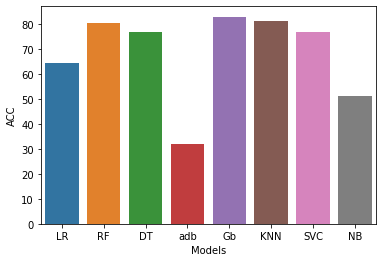

In [308]:
sns.barplot(final_data['Models'],final_data['ACC'])